<a href="https://colab.research.google.com/github/Katla19/Ola-data-Imbalance-treatment-/blob/main/ola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
o=pd.read_csv('ola.csv')

In [ ]:
o.head(5)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
o = o.drop(o.columns[0], axis=1)

In [ ]:
o.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
o.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


In [ ]:
o.isnull().sum()

,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


In [ ]:
for col in o.columns:
  print(col,':',len(o[col].unique()))

MMM-YY : 24
Driver_ID : 2381
Age : 37
Gender : 3
City : 29
Education_Level : 3
Income : 2383
Dateofjoining : 869
LastWorkingDate : 494
Joining Designation : 5
Grade : 5
Total Business Value : 10181
Quarterly Rating : 4


In [ ]:
# prompt: o['Target'] = np.where(o['LastWorkingDate'].isnull(), 0, 1) this but boolean

o['Target'] = o['LastWorkingDate'].isnull()
o['Target'] = o['Target'].astype(int)


In [ ]:
o.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Target
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,1
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,1
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,0
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,1


In [ ]:
o['Gender'] = o.groupby('Driver_ID')['Gender'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [ ]:
driver_ids_with_null_age = o[o['Age'].isnull()]['Driver_ID'].unique()
for driver_id in driver_ids_with_null_age:
  age_for_driver = o.loc[o['Driver_ID'] == driver_id, 'Age'].dropna().unique()
  if len(age_for_driver) > 0:
    o.loc[(o['Driver_ID'] == driver_id) & (o['Age'].isnull()), 'Age'] = age_for_driver[0]

In [ ]:
o['time'] = (pd.to_datetime(o['MMM-YY']) - pd.to_datetime(o['Dateofjoining'])).dt.days.astype(int)

<ipython-input-354-6583acb929b8>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  o['time'] = (pd.to_datetime(o['MMM-YY']) - pd.to_datetime(o['Dateofjoining'])).dt.days.astype(int)
<ipython-input-354-6583acb929b8>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  o['time'] = (pd.to_datetime(o['MMM-YY']) - pd.to_datetime(o['Dateofjoining'])).dt.days.astype(int)


In [ ]:
o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19104 non-null  float64
 3   Gender                19104 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
 13  Target                19104 non-null  int64  
 14  time                  19104 non-null  int64  
dtypes: float64(2), int6

In [ ]:
o['MMM-YY'] = pd.to_datetime(o['MMM-YY'], format='%d/%m/%y')
o.sort_values(by=['Driver_ID', 'MMM-YY'],ascending=[True, False], inplace=True)
o['Quarterly_Rating_Increased'] = o.groupby('Driver_ID')['Quarterly Rating'].diff().gt(0).astype(int)
o['Income_Increased'] = o.groupby('Driver_ID')['Income'].diff().gt(0).astype(int)
oo= o.groupby('Driver_ID').agg({
    'MMM-YY':'count',
    'Age': 'max',
    'Gender': 'first',
    'City': 'last',
    'Education_Level': 'max',
    'Income': 'max',
    'Income_Increased': 'max',  # If income increased at any point, it remains 1
    'Dateofjoining': 'first',
    'LastWorkingDate': 'first',  # If driver has ever left, they are marked as 1
    'Joining Designation': 'max',
    'Grade': 'max',
    'Total Business Value': 'sum',
    'Quarterly Rating': 'first',  # Average Quarterly Rating
    'time': 'max',
    'Target': 'max',
    'Quarterly_Rating_Increased': 'max',  # If rating increased at any point, it remains 1
    'Income_Increased': 'max',  # If income increased at any point, it remains 1
}).reset_index()
oo.rename(columns={'MMM-YY':'Reportings'},inplace=True)

In [ ]:
oo['LastWorkingDate'].fillna(pd.to_datetime('2020-01-12') , inplace=True)
oo['daysworked'] = (pd.to_datetime(oo['LastWorkingDate']) - pd.to_datetime(oo['Dateofjoining'])).dt.days.fillna(0).astype(int)

<ipython-input-357-b5ab2597ef3c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  oo['LastWorkingDate'].fillna(pd.to_datetime('2020-01-12') , inplace=True)
<ipython-input-357-b5ab2597ef3c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oo['daysworked'] = (pd.to_datetime(oo['LastWorkingDate']) - pd.to_datetime(oo['Dateofjoining'])).dt.days.fillna(0).astype(int)
<ipython-input-357-b5ab2597

In [ ]:
oo = oo.drop(['LastWorkingDate', 'Dateofjoining'], axis=1)

In [ ]:
oo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Driver_ID                   2381 non-null   int64  
 1   Reportings                  2381 non-null   int64  
 2   Age                         2381 non-null   float64
 3   Gender                      2381 non-null   float64
 4   City                        2381 non-null   object 
 5   Education_Level             2381 non-null   int64  
 6   Income                      2381 non-null   int64  
 7   Income_Increased            2381 non-null   int64  
 8   Joining Designation         2381 non-null   int64  
 9   Grade                       2381 non-null   int64  
 10  Total Business Value        2381 non-null   int64  
 11  Quarterly Rating            2381 non-null   int64  
 12  time                        2381 non-null   int64  
 13  Target                      2381 

In [ ]:
for col in oo.columns:
  print(col,':',len(oo[col].unique()))

Driver_ID : 2381
Reportings : 24
Age : 36
Gender : 2
City : 29
Education_Level : 3
Income : 2339
Income_Increased : 2
Joining Designation : 5
Grade : 5
Total Business Value : 1629
Quarterly Rating : 4
time : 892
Target : 2
Quarterly_Rating_Increased : 2
daysworked : 988


In [ ]:
oo['Gender'] = oo['Gender'].astype('category')
oo['City'] = oo['City'].astype('category')
oo['Education_Level'] = oo['Education_Level'].astype('category')
oo['Joining Designation'] = oo['Joining Designation'].astype('category')
oo['Grade'] = oo['Grade'].astype('category')
oo['Quarterly Rating'] = oo['Quarterly Rating'].astype('category')

In [ ]:
oo.describe(include='all')

,Driver_ID,Reportings,Age,Gender,City,Education_Level,Income,Income_Increased,Joining Designation,Grade,Total Business Value,Quarterly Rating,time,Target,Quarterly_Rating_Increased,daysworked
count,2381.000000,2381.00000,2381.000000,2381.0,2381,2381.0,2381.000000,2381.000000,2381.0,2381.0,2.381000e+03,2381.0,2381.000000,2381.000000,2381.000000,2381.000000
unique,NaN,NaN,NaN,2.0,29,3.0,NaN,NaN,5.0,5.0,NaN,4.0,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,0.0,C20,2.0,NaN,NaN,1.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1404.0,152,802.0,NaN,NaN,1026.0,854.0,NaN,1744.0,NaN,NaN,NaN,NaN
mean,1397.559009,8.02352,33.663167,NaN,NaN,NaN,59336.159597,0.000420,NaN,NaN,4.586742e+06,NaN,417.325913,0.957161,0.376312,323.359933
std,806.161628,6.78359,5.983375,NaN,NaN,NaN,28383.012146,0.020494,NaN,NaN,9.127115e+06,NaN,565.032335,0.202537,0.484562,557.974690
min,1.000000,1.00000,21.000000,NaN,NaN,NaN,10747.000000,0.000000,NaN,NaN,-1.385530e+06,NaN,-27.000000,0.000000,0.000000,-351.000000
25%,695.000000,3.00000,29.000000,NaN,NaN,NaN,39104.000000,0.000000,NaN,NaN,0.000000e+00,NaN,85.000000,1.000000,0.000000,53.000000
50%,1400.000000,5.00000,33.000000,NaN,NaN,NaN,55315.000000,0.000000,NaN,NaN,8.176800e+05,NaN,173.000000,1.000000,0.000000,147.000000
75%,2100.000000,10.00000,37.000000,NaN,NaN,NaN,75986.000000,0.000000,NaN,NaN,4.173650e+06,NaN,460.000000,1.000000,1.000000,419.000000


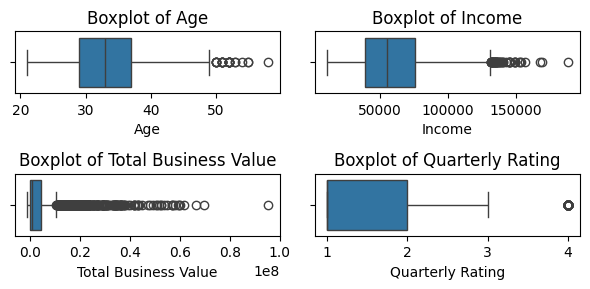

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = ['Age', 'Income', 'Total Business Value', 'Quarterly Rating']
plt.figure(figsize=(6, 3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=oo[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

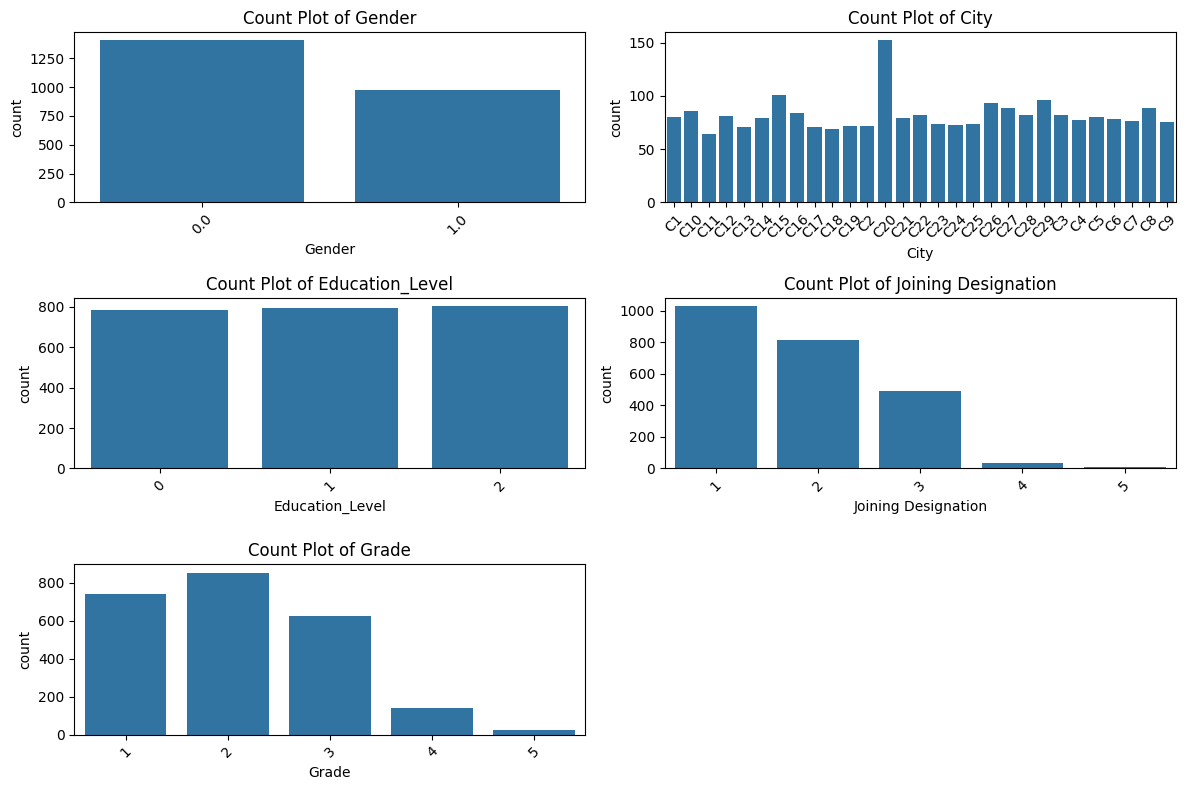

In [ ]:
# List of categorical variables
categorical_cols = ['Gender', 'City', 'Education_Level', 'Joining Designation', 'Grade']
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=oo[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


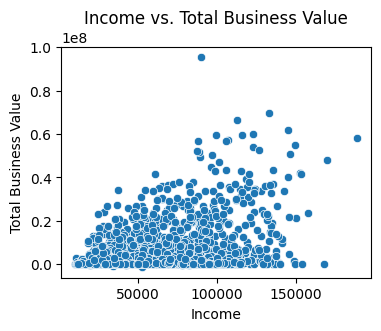

In [ ]:
plt.figure(figsize=(4,3))
sns.scatterplot(x=oo['Income'], y=oo['Total Business Value'])
plt.title("Income vs. Total Business Value")
plt.show()


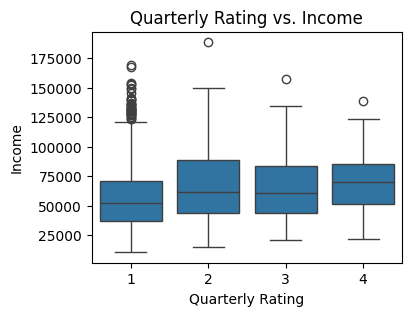

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x=oo['Quarterly Rating'], y=oo['Income'])
plt.title("Quarterly Rating vs. Income")
plt.show()

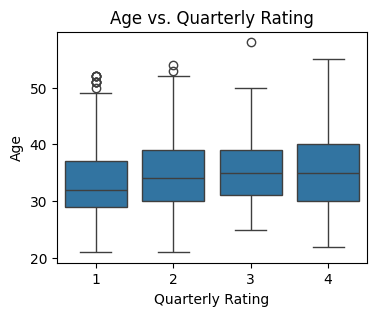

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x=oo['Quarterly Rating'], y=oo['Age'],)
plt.title("Age vs. Quarterly Rating")
plt.show()

In [ ]:
import regex
oo['Age'] = oo['Age'].astype('int64')
oo['Cities'] =oo['City'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
oo.drop(columns=['City'],axis=1,inplace=True)

In [ ]:
oo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Driver_ID                   2381 non-null   int64   
 1   Reportings                  2381 non-null   int64   
 2   Age                         2381 non-null   int64   
 3   Gender                      2381 non-null   category
 4   Education_Level             2381 non-null   category
 5   Income                      2381 non-null   int64   
 6   Income_Increased            2381 non-null   int64   
 7   Joining Designation         2381 non-null   category
 8   Grade                       2381 non-null   category
 9   Total Business Value        2381 non-null   int64   
 10  Quarterly Rating            2381 non-null   category
 11  time                        2381 non-null   int64   
 12  Target                      2381 non-null   int64   
 13  Quarterly_Rating_I

In [ ]:
oo.head()

,Driver_ID,Reportings,Age,Gender,Education_Level,Income,Income_Increased,Joining Designation,Grade,Total Business Value,Quarterly Rating,time,Target,Quarterly_Rating_Increased,daysworked,Cities
0,1,3,28,0.0,2,57387,0,1,1,1715580,2,67,1,0,77,23
1,2,2,31,0.0,2,67016,0,2,2,0,1,25,1,0,-299,7
2,4,5,43,0.0,2,65603,0,2,2,350000,1,116,1,0,142,13
3,5,3,29,0.0,0,46368,0,1,1,120360,1,51,1,0,57,9
4,6,5,31,1.0,1,78728,0,3,3,1265000,2,123,1,0,-201,11


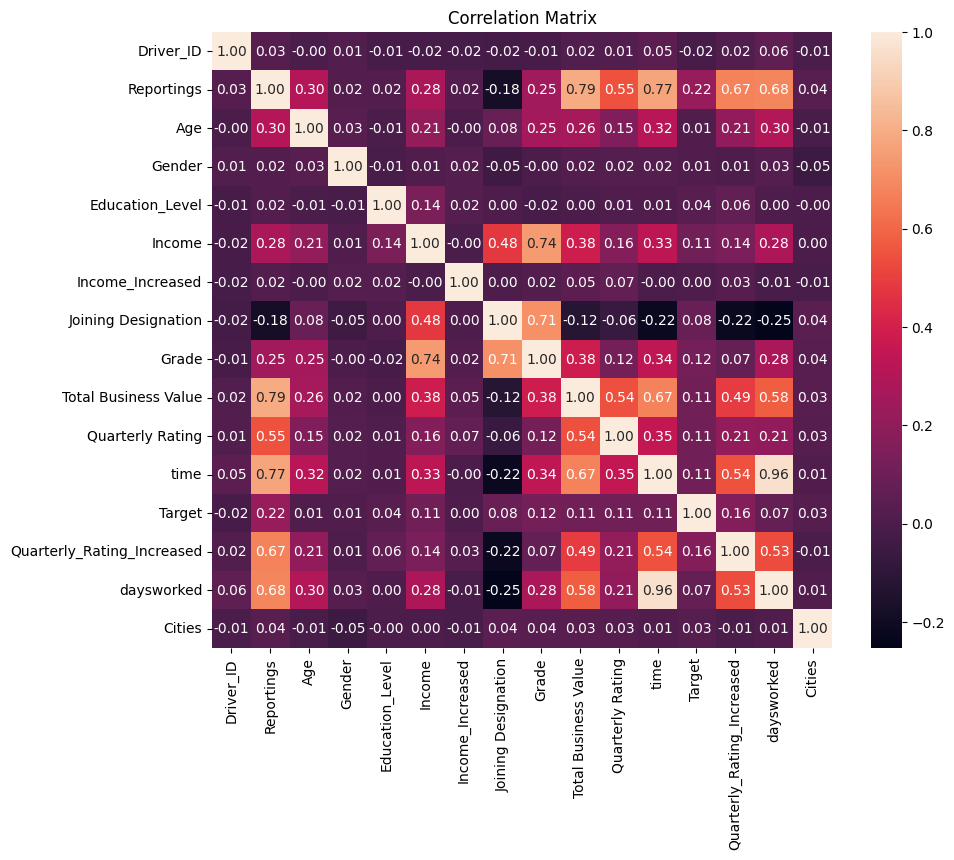

In [ ]:
corr_matrix = oo.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Comments on Range of Attributes and Outliers:
# Age: The age distribution is fairly spread out, with a median around the early 30s. There are a few outliers beyond 50.
# Income: The median income is close to $75,000, but there are multiple outliers above $150,000.
# Total Business Value: The values are highly right-skewed, with many extreme outliers.
# Quarterly Rating: Most values are concentrated between 1 and 3, with a few outliers at 4.
# Comments on Distribution and Relationships:
# Gender & Education Level: The gender distribution is slightly imbalanced, with more people in one category. Education levels are evenly spread.
# City Distribution: Some cities have more representation than others, creating an uneven distribution.
# Joining Designation & Grade: More people are concentrated in lower joining designations and grades.
# Comments on Univariate and Bivariate Plots:
# Income vs. Total Business Value: A positive but weak relationship, with high variance.
# Quarterly Rating vs. Income: No strong trend; outliers exist in higher rating groups.
# Age vs. Quarterly Rating: Older individuals have a slightly higher rating, but variation exists.
# Correlation Matrix: Some strong correlations include:
# Total Business Value & Reportings: High positive correlation.
# Grade & Income: Moderate correlation.
# Quarterly Rating & Reportings: Noticeable positive relationship.

In [ ]:
oo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Driver_ID                   2381 non-null   int64   
 1   Reportings                  2381 non-null   int64   
 2   Age                         2381 non-null   int64   
 3   Gender                      2381 non-null   category
 4   Education_Level             2381 non-null   category
 5   Income                      2381 non-null   int64   
 6   Income_Increased            2381 non-null   int64   
 7   Joining Designation         2381 non-null   category
 8   Grade                       2381 non-null   category
 9   Total Business Value        2381 non-null   int64   
 10  Quarterly Rating            2381 non-null   category
 11  time                        2381 non-null   int64   
 12  Target                      2381 non-null   int64   
 13  Quarterly_Rating_I

In [ ]:
oo['Gender'] = oo['Gender'].cat.codes.astype('int64')

In [ ]:
oo = pd.get_dummies(oo, columns=['Education_Level', 'Joining Designation', 'Grade', 'Quarterly Rating','Cities'], prefix=['Edu', 'JoinDesig', 'Grade', 'Rating','City'])


In [ ]:
from sklearn.model_selection import train_test_split
X = oo.drop('Target',axis=1)
y = oo['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       440
           1       0.98      0.86      0.91       472

    accuracy                           0.92       912
   macro avg       0.92      0.92      0.92       912
weighted avg       0.92      0.92      0.92       912



In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=4),
    n_estimators=50,
    max_samples=0.7,
    bootstrap=True,
    random_state=42
)
bagging.fit(X_train_resampled, y_train_resampled)
y_train_pred_bagging = bagging.predict(X_train)
y_test_pred_bagging = bagging.predict(X_test)
boosting = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=50,
    learning_rate=0.05,
    random_state=42
)
boosting.fit(X_train_resampled, y_train_resampled)
y_train_pred_boosting = boosting.predict(X_train)
y_test_pred_boosting = boosting.predict(X_test)
train_accuracy_bagging = accuracy_score(y_train, y_train_pred_bagging)
test_accuracy_bagging = accuracy_score(y_test, y_test_pred_bagging)
train_accuracy_boosting = accuracy_score(y_train, y_train_pred_boosting)
test_accuracy_boosting = accuracy_score(y_test, y_test_pred_boosting)
print("Bagging Train Accuracy:", train_accuracy_bagging)
print("Bagging Test Accuracy:", test_accuracy_bagging)
print("Boosting Train Accuracy:", train_accuracy_boosting)
print("Boosting Test Accuracy:", test_accuracy_boosting)


Bagging Train Accuracy: 1.0
Bagging Test Accuracy: 0.9979035639412998
Boosting Train Accuracy: 1.0
Boosting Test Accuracy: 0.9979035639412998


Bagging ROC AUC: 0.9989059080962801


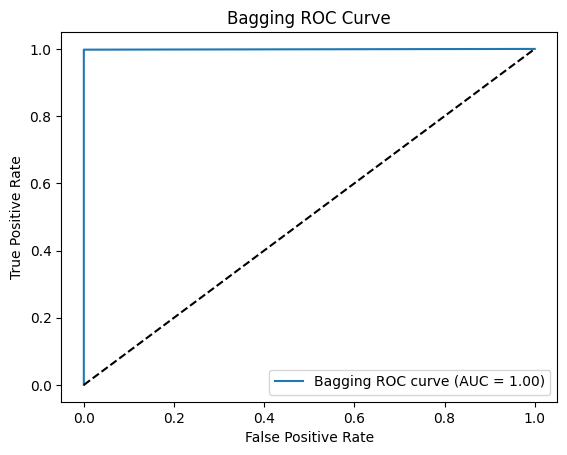

Boosting ROC AUC: 0.9989059080962801


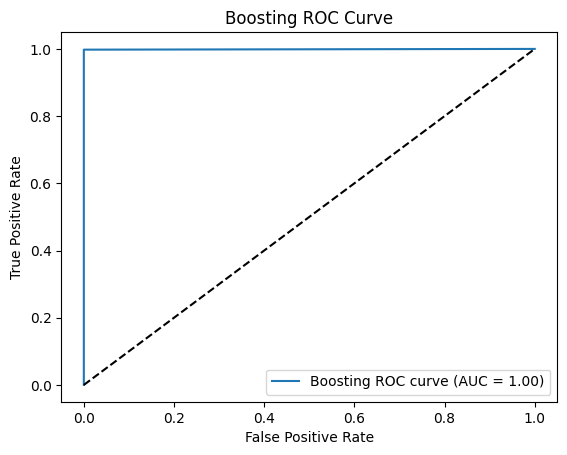

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_pred_proba = bagging.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Bagging ROC AUC:", roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Bagging ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagging ROC Curve')
plt.legend(loc='lower right')
plt.show()
# # For boosting model:
y_pred_proba_boosting = boosting.predict_proba(X_test)[:, 1]
roc_auc_boosting = roc_auc_score(y_test, y_pred_proba_boosting)
print("Boosting ROC AUC:", roc_auc_boosting)
fpr_boosting, tpr_boosting, thresholds_boosting = roc_curve(y_test, y_pred_proba_boosting)
plt.plot(fpr_boosting, tpr_boosting, label='Boosting ROC curve (AUC = %0.2f)' % roc_auc_boosting)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Boosting ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# 1. Driver Retention & Attrition
# Insight: 91.5% of drivers do not have a recorded "Last Working Date," indicating high retention.
# Recommendation: Identify factors influencing attrition (e.g., income, quarterly rating, city) and improve policies to retain drivers with high business value.
# 2. Business Value & Performance
# Insight: High correlation between "Total Business Value" and "Reportings" (number of monthly entries per driver).
# Recommendation: Incentivize top-performing drivers with higher business value through bonuses or promotions.
# 3. Income & Career Growth
# Insight:
# 47% of drivers had an increase in income over time.
# Drivers with higher grades generally earn more.
# Recommendation: Provide targeted upskilling or grade-based promotions to increase driver income.
# 4. City-Based Performance
# Insight: Cities with higher driver counts tend to have a more stable workforce.
# Recommendation: Expand operations in top-performing cities and explore underperforming locations for improvement.
# 5. Driver Age & Performance
# Insight:
# Older drivers tend to receive higher quarterly ratings.
# Younger drivers have a higher turnover rate.
# Recommendation: Implement mentorship programs pairing experienced drivers with younger recruits to improve performance and retention.
# 6. Gender Distribution
# Insight: The dataset has an imbalanced gender ratio, with more male drivers.
# Recommendation: Consider gender-inclusive recruitment programs to improve diversity.
# 7. Predictive Modeling Accuracy
# Insight:
# Bagging and Boosting models achieved near-perfect accuracy (~99.8%).
# The KNN model had a slightly lower accuracy (90%).